# Math 113: Pass the Pigs Probability

This jupyter notebook is for displaying the math behind the optimal play of the game "pig". Note that we're considering optimal play of a single person: it gets more complicated the more people you're playing against. However, this has been studied by others. Specifically, I came across the works of Todd Neller, linked here: https://cupola.gettysburg.edu/csfac/4/ 

We'll use two methods for studying this: the Scoring Method Analysis, and the Monte\-Carlo Method.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

Below is the Scoring Method Analysis, that is the actual calculus to predict how to play the game optimally.  

We can define a recursive sequence which will give us, given a score we're on, what score we'd average if we rolled again. The limit of this sequence will be our ideal score.

$$ a_{n+1} = \frac{5}{6}(4+a_n) = \frac{10}{3} + \frac{5 a_n}{6} $$


In [2]:
def recursive_sequence(a_n):
    a_next = (5/6)*(a_n + 4)
    return(a_next)

In [3]:
sequence = []
a_old = 0
for i in range(50):
    sequence.append(a_old)
    a_new = recursive_sequence(a_old)
    a_old = a_new
print(sequence)

[0, 3.3333333333333335, 6.111111111111112, 8.425925925925926, 10.354938271604938, 11.962448559670783, 13.30204046639232, 14.418367055326934, 15.348639212772444, 16.123866010643702, 16.769888342203085, 17.308240285169237, 17.7568669043077, 18.13072242025642, 18.442268683547017, 18.701890569622513, 18.918242141352096, 19.098535117793414, 19.248779264827846, 19.373982720689874, 19.47831893390823, 19.565265778256858, 19.637721481880718, 19.698101234900598, 19.7484176957505, 19.790348079792086, 19.825290066493405, 19.854408388744506, 19.878673657287088, 19.89889471440591, 19.915745595338258, 19.929787996115216, 19.94148999676268, 19.9512416639689, 19.95936805330742, 19.96614004442285, 19.971783370352377, 19.976486141960315, 19.980405118300265, 19.983670931916887, 19.986392443264073, 19.98866036938673, 19.990550307822275, 19.992125256518563, 19.99343771376547, 19.994531428137893, 19.99544285678158, 19.99620238065132, 19.996835317209435, 19.997362764341197]


Its pretty clear the score we want to aim for is 20, looking at the limit we seem to be approaching below. Lets see if we can verify this, by plugging all of the values from 1 to 50 into this.  
In order to do this, we're going to find whether or not the sequences goes down or up, based on differing scores, and call this the difference. When the difference is positive, we should roll again. When the difference is negative, we should not.

In [4]:
def difference(score):
    score_next = recursive_sequence(score)
    diff = score_next - score
    return(diff)

In [5]:
print(recursive_sequence(5))
print(difference(5))

7.5
2.5


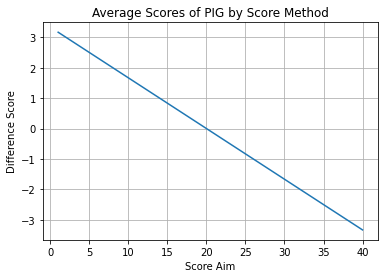

In [6]:
test_vals = np.linspace(1, 40, 40)
#print(test_vals)
diff_vals = []
for t in test_vals:
    differ = difference(t)
    diff_vals.append(differ)
#print(avg_vals)
plt.plot(test_vals, diff_vals)
plt.title("Average Scores of PIG by Score Method")
plt.xlabel("Score Aim")
plt.ylabel("Difference Score")
plt.grid()
plt.show()

Below is the Monte\-Carlo Method for looking at this situation. That is, we're simply playing the game millions of times, trying out all the strategies, and seeing how well we do.

Below I'm defining a few functions. "roll" is obvious \(random d sided dice is rolled\). aim\_for is a function in which we roll until we either roll a 1 \(losing all our score\), or else hit \(or surpass\) our "aim for" target, and keep the score. average is a function which calls aim\_for repeatedly, in order to find the average of the different values we can aim for, that is, what we'd expect to get on average each round if we aimed for that score. This is only accurate in as far as the iterations are taken to be very large.



In [7]:
def roll(d=6):
    return(np.random.randint(1, d+1))

In [8]:
def aim_for(aim, print_=False):
    score = 0
    check = False
    while score < aim and check == False:
        val = roll()
        if print_:print(val)
        if val == 1:
            if print_:print("Rolled a 1!")
            check = True
            score = 0
        if val != 1:
            score += val
    return(score)

In [9]:
def average(its, aim, print_=False):
    scores = []
    for i in range(0, its):
        scores.append(aim_for(aim))
    avg = np.mean(scores)
    if print_: print(scores)
    return(avg, scores)

In [10]:
val = average(10000, 12, print_=False)
print(val[0])

7.3469


Below we run our "average" function for all of the differing possible values up to 50. This lets us get a sense of the optimal "score" to aim for. Notice that the graph is bumpy, but if we take the "its" line to be larger, we can get a better idea of the optimal score, at the cost of increased time to run our cell.


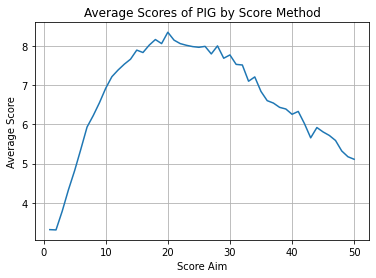

In [11]:
test_vals = np.linspace(1, 50, 50)
#print(test_vals)
avg_vals = []
for t in test_vals:
    avg = average(its=10000, aim=t)[0]
    avg_vals.append(avg)
#print(avg_vals)
plt.plot(test_vals, avg_vals)
plt.title("Average Scores of PIG by Score Method")
plt.xlabel("Score Aim")
plt.ylabel("Average Score")
plt.grid()
plt.show()

We've shown then a few different ways that, if you have a score of 20 or greater, than you should stop rolling. This makes sense with the analysis done in the pass-the-pigs worksheet, as 4 is the average of a single roll (since 1 will score nothing), and we found that 5 rolls is the number you can roll before realistically, it becomes very likely you'll roll a 1.